# Galaxy10 Tutorial

### Introduction

This notebook will demonstrate how to train a simple convolutional neural network with astroNN on Galaxy10 dataset to classify galaxy images.

Galaxy10 is a dataset contains 25753 69x69 pixels colored galaxy images (g, r and i band) separated in 10 classes. Galaxy10 images come from Sloan Digital Sky Survey and labels come from Galaxy Zoo.

There is no guarantee on the accuracy of the labels. Moreover, Galaxy10 is not a balanced dataset and it should only be used for educational or experimental purpose. If you use Galaxy10 for research purpose, please cite Galaxy Zoo and Sloan Digital Sky Survey.

For more information on the original classification tree: https://data.galaxyzoo.org/gz_trees/gz_trees.html

### Authors and Basic Information

*  **Henry Leung** - Astronomy student, University of Toronto - henrysky
* Project advisor: **Jo Bovy** - Professor, Department of Astronomy and Astrophysics, University of Toronto - jobovy
*  Contact Henry: henrysky.leung [at] utoronto.ca
* This tutorial is created on 10/Feb/2018 with Keras 2.1.3, Tensorflow 1.6.0, Nvidia CuDNN 7.0 for CUDA 9.0 (Optional), Python 3.6.3 Win10 x64
* Updated on 31/Jan/2010, Tensorflow 2.1.0

### This tutorial will be using astroNN

* Galaxy10 description on astroNN: https://astronn.readthedocs.io/en/latest/galaxy10.html

* astroNN github: https://github.com/henrysky/astroNN

* astroNN documentation: https://astronn.readthedocs.io/

![galaxy10](https://astronn.readthedocs.io/en/latest/_images/galaxy10_example.png)

### Acknowledgments
1. Galaxy10 dataset classification labels come from Galaxy Zoo
2. Galaxy10 dataset images come from Sloan Digital Sky Survey (SDSS)


WARNING! Gaia environment variable GAIA_TOOLS_DATA not set
C:\Users\Henry\.astroNN\datasets\Galaxy10.h5 was found!
===================Data Inspection===================


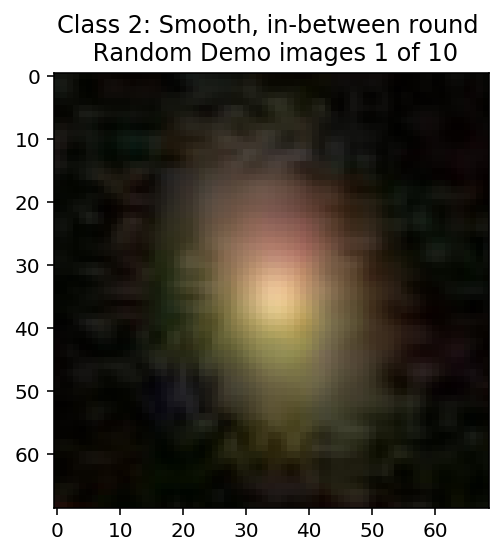

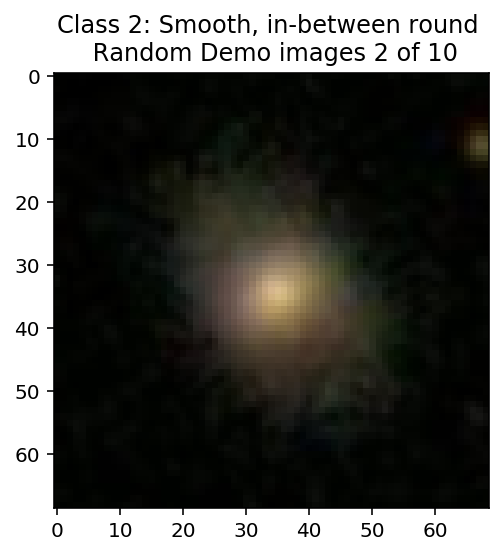

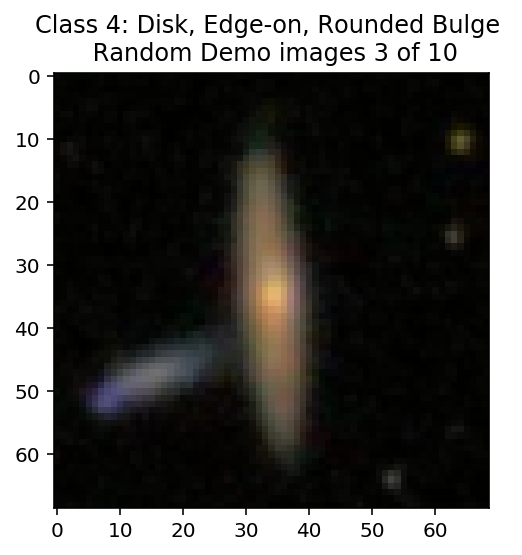

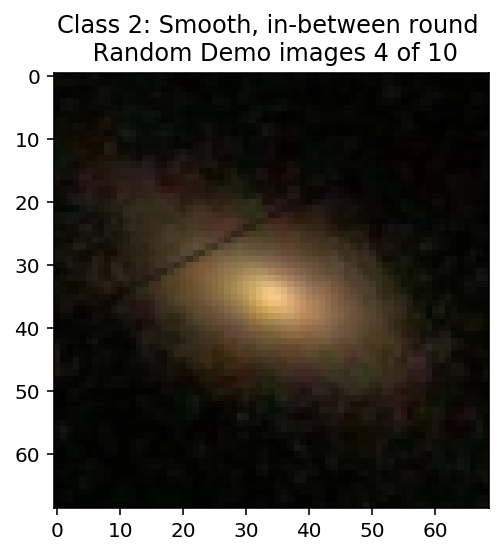

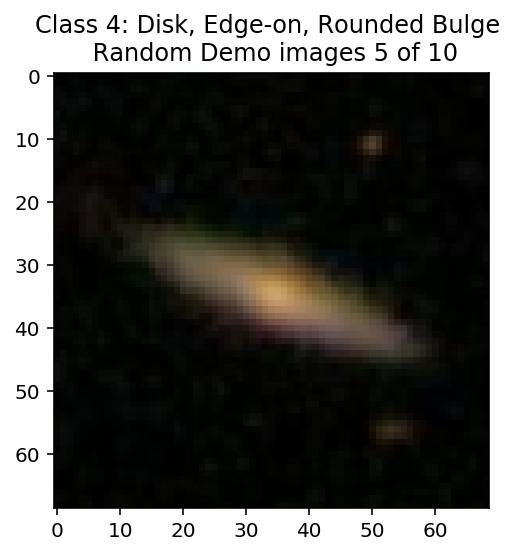

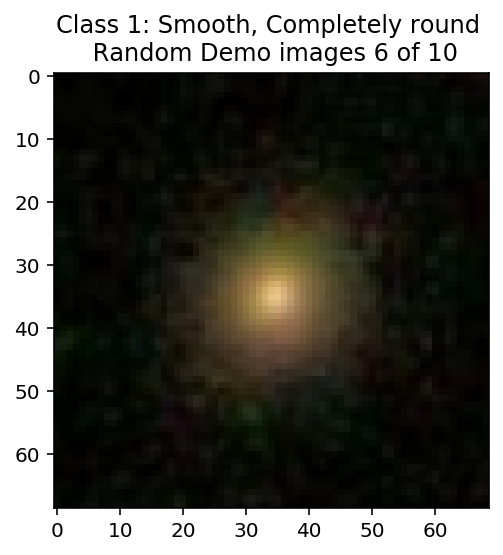

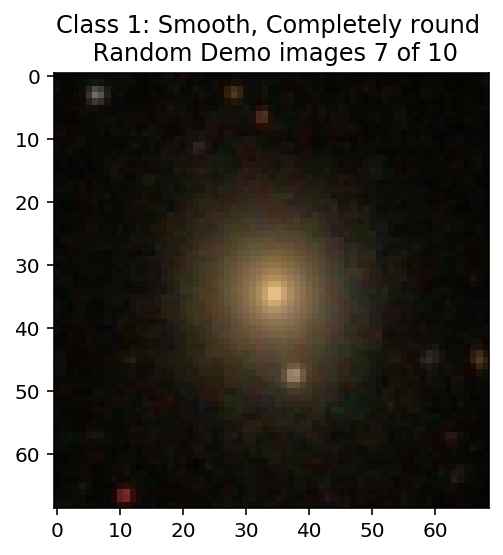

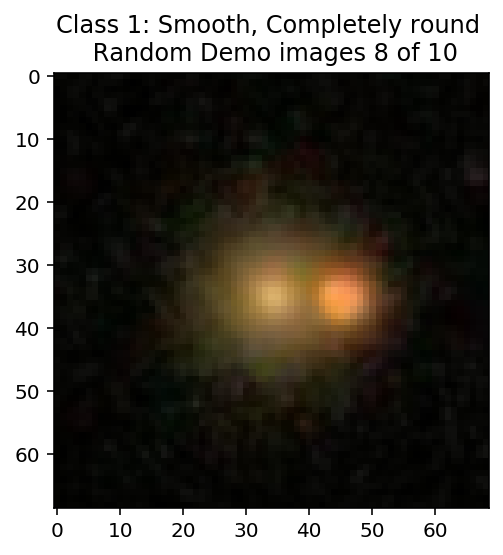

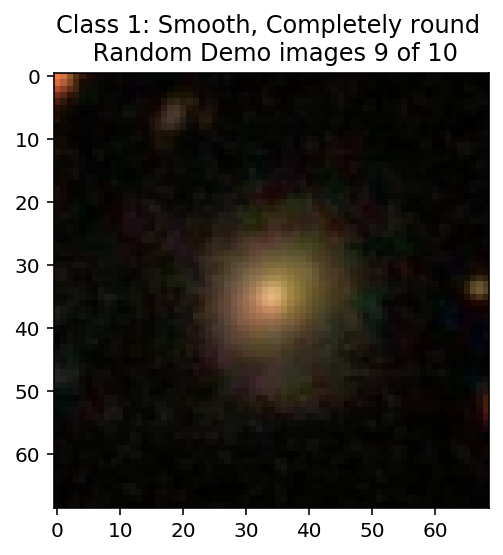

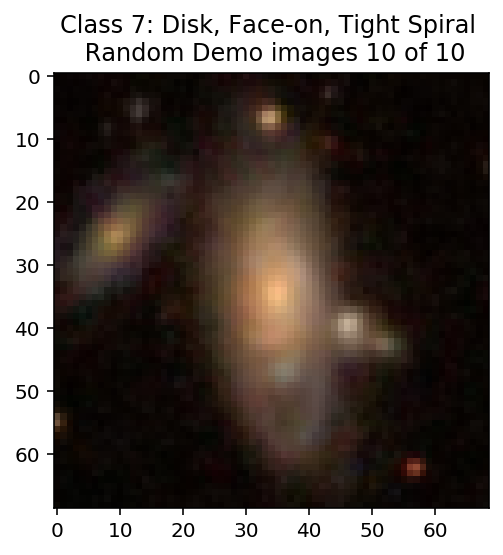

===============Data Inspection Finished===============
Number of Training Data: 17646, Number of Validation Data: 1960
====Message from Normalizer====
You selected mode: 255
Featurewise Center: False
Datawise Center: False
Featurewise std Center: False
Datawise std Center: False
====Message ends====
====Message from Normalizer====
You selected mode: 0
Featurewise Center: False
Datawise Center: False
Featurewise std Center: False
Datawise std Center: False
====Message ends====
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
Epoch 1/5
275/275 - 8s - loss: 11.5597 - categorical_accuracy: 0.2862 - val_loss: 11.3466 - val_categorical_accuracy: 0.3010
Epoch 2/5
Epoch 1/5

Epoch 00002: ReduceLROnPlateau reducing learning rate to 0.0024999999441206455.
275/275 - 5s - loss: 11.5033 - categorical_accuracy: 0.2905 - val_loss: 11.3966 - val_categorical_accuracy: 0.2964
Epoch 3/5
E

c:\users\henry\documents\github\astronn\astroNN\datasets\galaxy10.py:143: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


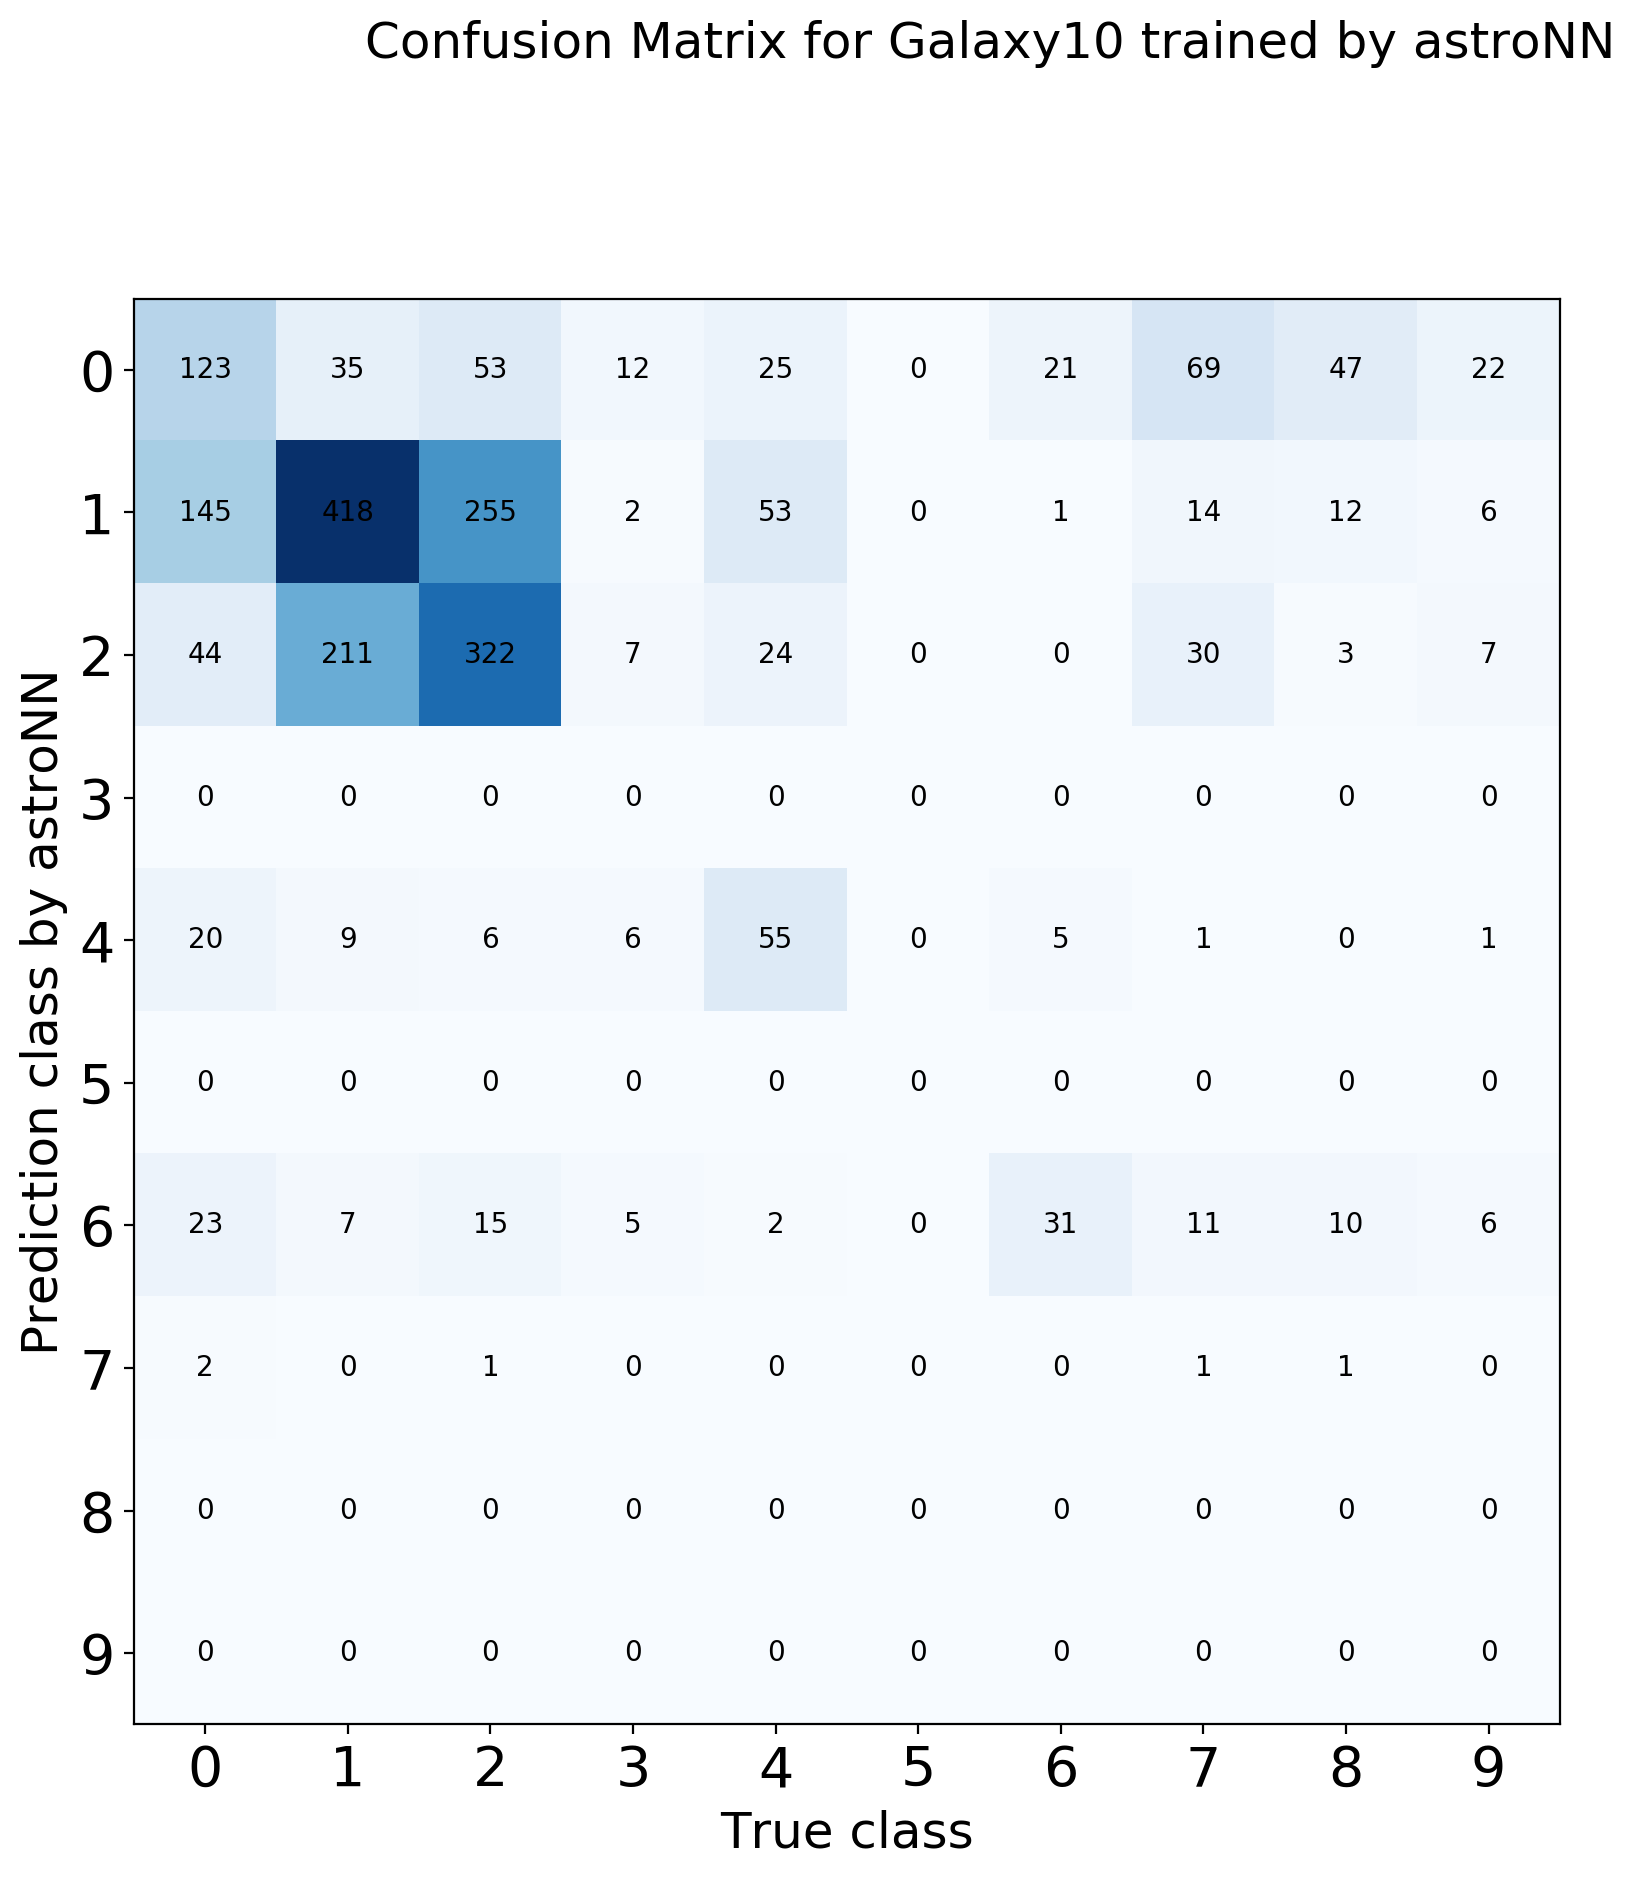

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

# import everything we need first
from keras import utils
import numpy as np
from sklearn.model_selection import train_test_split
import pylab as plt

from astroNN.models import Galaxy10CNN
from astroNN.datasets import galaxy10
from astroNN.datasets.galaxy10 import galaxy10cls_lookup, galaxy10_confusion

# To load images and labels (will download automatically at the first time)
# First time downloading location will be ~/.astroNN/datasets/
images, labels = galaxy10.load_data()

# To convert the labels to categorical 10 classes
labels = utils.to_categorical(labels, 10)

# Select 10 of the images to inspect
img = None
plt.ion()
print("===================Data Inspection===================")
for counter, i in enumerate(range(np.random.randint(0, labels.shape[0], size=10).shape[0])):
    img = plt.imshow(images[i])
    plt.title(f"Class {np.argmax(labels[i])}: {galaxy10cls_lookup(labels[i])} \n Random Demo images {counter+1} of 10")
    plt.draw()
    plt.pause(2.)
plt.close("all")
print("===============Data Inspection Finished===============")

# To convert to desirable type
labels = labels.astype(np.float32)
images = images.astype(np.float32)

# Split the dataset into training set and testing set
train_idx, test_idx = train_test_split(np.arange(labels.shape[0]), test_size=0.1)
train_images, train_labels, test_images, test_labels = images[train_idx], labels[train_idx], images[test_idx], labels[test_idx]

# To create a neural network instance
galaxy10net = Galaxy10CNN()

# set maximium epochs the neural network can run, set 5 to get quick result
galaxy10net.max_epochs = 5

# To train the nerual net
# astroNN will normalize the data by default
galaxy10net.train(train_images, train_labels)

# print model summary before training
galaxy10net.keras_model.summary()

# After the training, you can test the neural net performance
# Please notice predicted_labels are labels predicted from neural network. test_labels are ground truth from the dataset
predicted_labels = galaxy10net.test(test_images)

# Convert predicted_labels to class
prediction_class = np.argmax(predicted_labels, axis=1)

# Convert test_labels to class
test_class = np.argmax(test_labels, axis=1)

# Prepare a confusion matrix
confusion_matrix = np.zeros((10,10))

# create the confusion matrix
for counter, i in enumerate(prediction_class):
    confusion_matrix[i, test_class[counter]] += 1

# Plot the confusion matrix
galaxy10_confusion(confusion_matrix)